In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [28]:
df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')
df_interpolados = pd.read_csv("../dados/dados interpolados mes.csv")


In [29]:
print(df_places.centroid.x, df_places.centroid.y)
df_places["lat"] = df_places.centroid.x
df_places["long"] = df_places.centroid.y

0     -49.275416
1     -49.257088
2     -49.266252
3     -49.269547
4     -49.251219
         ...    
879   -49.345733
880   -49.354895
881   -49.336570
882   -49.358189
883   -49.327407
Length: 884, dtype: float64 0     -25.533110
1     -25.531334
2     -25.532222
3     -25.539459
4     -25.537683
         ...    
879   -25.629754
880   -25.630633
881   -25.628874
882   -25.637856
883   -25.627993
Length: 884, dtype: float64


/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_27423/1337249125.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(df_places.centroid.x, df_places.centroid.y)
/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_27423/1337249125.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(df_places.centroid.x, df_places.centroid.y)
/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_27423/1337249125.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_places["lat"] = df_places.centroid.x
/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipyk

In [30]:
df_places['date']= pd.to_datetime(df_places['date'])
df_places.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      884 non-null    datetime64[ns]
 1   score     884 non-null    int64         
 2   hex       884 non-null    object        
 3   NOME      884 non-null    object        
 4   geometry  884 non-null    geometry      
 5   lat       884 non-null    float64       
 6   long      884 non-null    float64       
dtypes: datetime64[ns](1), float64(2), geometry(1), int64(1), object(2)
memory usage: 48.5+ KB


In [31]:
df_places = df_places.drop(columns = 'score')
df_places = df_places.drop(columns = 'date')
df_places = df_places.drop_duplicates()
df_places.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 617 entries, 0 to 883
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   hex       617 non-null    object  
 1   NOME      617 non-null    object  
 2   geometry  617 non-null    geometry
 3   lat       617 non-null    float64 
 4   long      617 non-null    float64 
dtypes: float64(2), geometry(1), object(2)
memory usage: 28.9+ KB


In [32]:
df_interpolados = df_interpolados.drop(columns = 'Unnamed: 0')
df_interpolados['date']= pd.to_datetime(df_interpolados['dataHora'])
df_interpolados = df_interpolados.drop(columns = 'dataHora')
df_interpolados.head()

,valorMedido,latitude,longitude,date
0,[2.39636],-49.387605,-25.433210,2018-01-01
1,[4.55364],-49.385034,-25.446811,2018-01-01
2,[1.56134],-49.384311,-25.425967,2018-01-01
3,[10.4152],-49.383186,-25.481245,2018-01-01
4,[7.29905],-49.382463,-25.460410,2018-01-01


In [33]:
df_interpolados.loc[df_interpolados["valorMedido"] == "-1", "valorMedido"] = "[0]"
# df_merged["valorMedido"] = df_merged["valorMedido"]
df_interpolados['valorMedido'] = df_interpolados['valorMedido'].str.replace('[','')
df_interpolados['valorMedido'] = df_interpolados['valorMedido'].str.replace(']','')
df_interpolados["valorMedido"] = pd.to_numeric(df_interpolados["valorMedido"])

df_interpolados.head()

/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_27423/1121564080.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_interpolados['valorMedido'] = df_interpolados['valorMedido'].str.replace('[','')
/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_27423/1121564080.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_interpolados['valorMedido'] = df_interpolados['valorMedido'].str.replace(']','')


,valorMedido,latitude,longitude,date
0,2.39636,-49.387605,-25.433210,2018-01-01
1,4.55364,-49.385034,-25.446811,2018-01-01
2,1.56134,-49.384311,-25.425967,2018-01-01
3,10.41520,-49.383186,-25.481245,2018-01-01
4,7.29905,-49.382463,-25.460410,2018-01-01


In [34]:
df_interpolados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873672 entries, 0 to 873671
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   valorMedido  873672 non-null  float64       
 1   latitude     873672 non-null  float64       
 2   longitude    873672 non-null  float64       
 3   date         873672 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 26.7 MB


In [35]:
df_interpolados_sum = df_interpolados.groupby(["latitude", "longitude", pd.PeriodIndex(df_interpolados['date'], freq="D")])['valorMedido'].sum().reset_index()

In [36]:
df_merged = df_places.merge(df_interpolados_sum, left_on=["lat", "long"], right_on=["latitude", "longitude"])
df_merged.head() 

,hex,NOME,geometry,lat,long,latitude,longitude,date,valorMedido
0,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",-49.269547,-25.539459,-49.269547,-25.539459,2018-01-01,13.859383
1,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",-49.269547,-25.539459,-49.269547,-25.539459,2018-01-02,3.863132
2,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",-49.269547,-25.539459,-49.269547,-25.539459,2018-01-03,0.000000
3,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",-49.269547,-25.539459,-49.269547,-25.539459,2018-01-04,0.000000
4,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",-49.269547,-25.539459,-49.269547,-25.539459,2018-01-05,0.000000


In [37]:
df_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24072 entries, 0 to 24071
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   hex          24072 non-null  object   
 1   NOME         24072 non-null  object   
 2   geometry     24072 non-null  geometry 
 3   lat          24072 non-null  float64  
 4   long         24072 non-null  float64  
 5   latitude     24072 non-null  float64  
 6   longitude    24072 non-null  float64  
 7   date         24072 non-null  period[D]
 8   valorMedido  24072 non-null  float64  
dtypes: float64(5), geometry(1), object(2), period[D](1)
memory usage: 1.8+ MB


In [38]:
df_merged = df_merged.sort_values(by=["hex", 'date'])

In [39]:
f = lambda x: x.rolling(3).sum().shift()
df_merged['value_last_3_days'] = df_merged.groupby('hex').valorMedido.apply(f)

/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_27423/1487777213.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_merged['value_last_3_days'] = df_merged.groupby('hex').valorMedido.apply(f)


In [40]:
f = lambda x: x.rolling(7).sum().shift()
df_merged['value_last_7_days'] = df_merged.groupby('hex').valorMedido.apply(f)

/var/folders/ld/8dhf4gy93xbd1ybmf6nljm38dn1p1r/T/ipykernel_27423/2449180256.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_merged['value_last_7_days'] = df_merged.groupby('hex').valorMedido.apply(f)


In [41]:
# df_merged[df_merged["date"] == datetime(year=2018, month=1, day=7)]
df_merged[df_merged["hex"] == "88a804cb05fffff"][:5]

,hex,NOME,geometry,lat,long,latitude,longitude,date,valorMedido,value_last_3_days,value_last_7_days
19411,88a804cb05fffff,SANTA FELICIDADE,"POLYGON ((-49.32706 -25.38348, -49.32291 -25.3...",-49.327917,-25.378939,-49.327917,-25.378939,2018-01-01,2.427298,NaN,NaN
19412,88a804cb05fffff,SANTA FELICIDADE,"POLYGON ((-49.32706 -25.38348, -49.32291 -25.3...",-49.327917,-25.378939,-49.327917,-25.378939,2018-01-02,7.632863,NaN,NaN
19413,88a804cb05fffff,SANTA FELICIDADE,"POLYGON ((-49.32706 -25.38348, -49.32291 -25.3...",-49.327917,-25.378939,-49.327917,-25.378939,2018-01-03,0.000000,NaN,NaN
19414,88a804cb05fffff,SANTA FELICIDADE,"POLYGON ((-49.32706 -25.38348, -49.32291 -25.3...",-49.327917,-25.378939,-49.327917,-25.378939,2018-01-04,0.000000,10.060161,NaN
19415,88a804cb05fffff,SANTA FELICIDADE,"POLYGON ((-49.32706 -25.38348, -49.32291 -25.3...",-49.327917,-25.378939,-49.327917,-25.378939,2018-01-05,0.000000,7.632863,NaN


In [42]:
df_merged.date.unique()

<PeriodArray>
['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
 '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
 '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14', '2018-01-15',
 '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
 '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
 '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30',
 '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
 '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
 '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14',
 '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19',
 '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24',
 '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28']
Length: 59, dtype: period[D]

In [43]:
df_merged = df_merged.fillna(0.0)

In [47]:
df_merged.date.unique()

<PeriodArray>
['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
 '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
 '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14', '2018-01-15',
 '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
 '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
 '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30',
 '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
 '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
 '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14',
 '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19',
 '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24',
 '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28']
Length: 59, dtype: period[D]

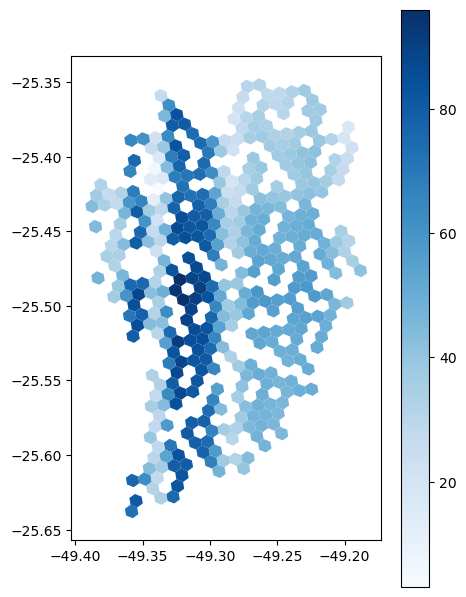

In [52]:
df_places_filter = df_merged[df_merged.date == "2018-01-19"]
df_places_filter[:10]

df_places_filter.plot(column="value_last_3_days", cmap='Blues', figsize = (5,7.5), legend=True)
plt.show()

# df_places

<AxesSubplot: >

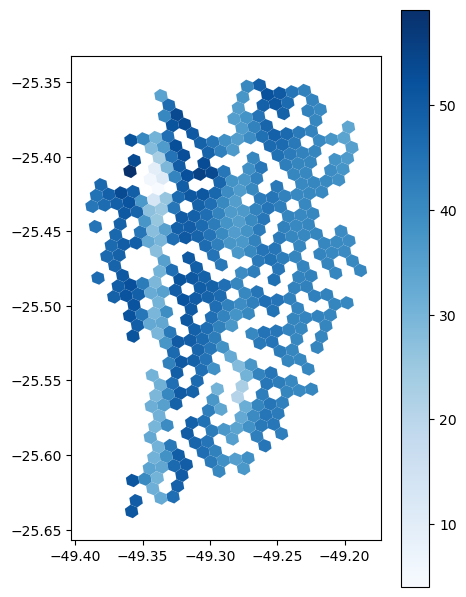

In [53]:
df_places_filter.plot(column="valorMedido", cmap='Blues', figsize = (5,7.5), legend=True)

<AxesSubplot: >

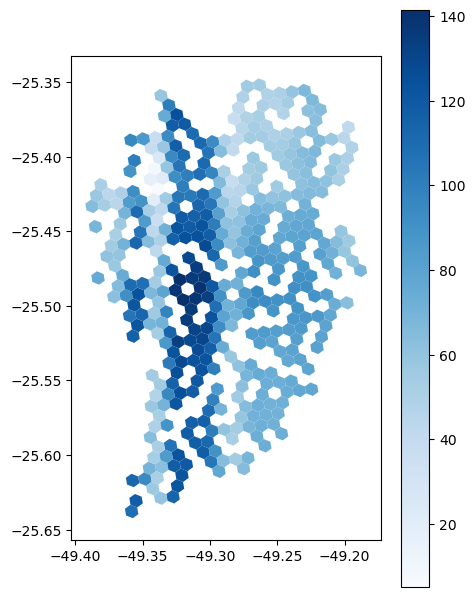

In [54]:
df_places_filter.plot(column="value_last_7_days", cmap='Blues', figsize = (5,7.5), legend=True)

In [55]:
df_places_filter.to_csv("../dados/dados_pluviometricos_geo_19_01_2018.csv", index=False)

In [ ]:
print(df_merged.crs)

In [ ]:
df_merged.to_csv("../dados/dados_pluviometricos_geo.csv", index=False)

In [ ]:
df = pd.read_csv("../dados/dados_pluviometricos_geo.csv")

gdf = gpd.GeoDataFrame(
    df,
    crs={'init': 'epsg:4326'},
    geometry=gpd.points_from_xy(df.latitude, df.longitude)
)

In [ ]:
df.head()

In [ ]:
df_places_filter = gdf[gdf.date == "2018-02-20"]
df_places_filter[:10]

df_places_filter.plot(column="value_last_3_days", cmap='Blues', figsize = (5,7.5), legend=True)
plt.show()

# df_places